In [1]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import copy
import h5py
import numpy as np
import matplotlib
import re

import matplotlib.pyplot as plt
from dedalus.extras import plot_tools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

import os
from os import listdir

In [2]:
# Parameters
Lx, Lz = 40,1
Nx, Nz = 1280, 32
Ra_M = 1.0e6
M_0 = 0
M_H = -1


Prandtl = 0.7
stop_sim_time = 1000

nu = (Ra_M / (Prandtl*(M_0-M_H)*Lz**3))**(-1/2)

In [3]:
folder_dir = "analysis"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths)

['analysis/analysis_s1.h5', 'analysis/analysis_s2.h5', 'analysis/analysis_s3.h5', 'analysis/analysis_s4.h5', 'analysis/analysis_s5.h5', 'analysis/analysis_s6.h5', 'analysis/analysis_s7.h5', 'analysis/analysis_s8.h5', 'analysis/analysis_s9.h5', 'analysis/analysis_s10.h5']


In [3]:
"""
DEBUGGING CONTROL GROUP
"""
folder_dir = "snapshots"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uuyy = file['tasks']['uy']
        uuxz = file['tasks']['u']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uuuyyy = np.transpose(uuyy[t, :, :])
            uuxz_trans = np.transpose(uuxz[t, :, :])
            print(np.average(uuuyyy), np.sum(np.square(uuuyyy)))
            print(np.average(uuxz_trans), np.sum(np.square(uuxz_trans)),np.max(uuxz_trans), np.min(uuxz_trans))
            uxxuzz = np.ndarray.tolist(uuxz_trans)
            for lay_1 in range(len(uuxz_trans)):
                for lay_2 in range(len(uuxz_trans[lay_1])):
                    modulus = np.linalg.norm(uuxz_trans[lay_1][lay_2])
                    uxxuzz[lay_1][lay_2] = modulus
            to_plot = np.square(uuuyyy)+np.square(uxxuzz)
            all_tot_ke.append(np.sum(to_plot))
            if t == 8:
                break
        print(len(all_tot_ke))
        print(np.max(all_tot_ke))
#print(all_tot_ke[])

0.0 0.0
0.0 0.0 0.0 0.0
4.666768281635809e-15 8.301723294262726e-11
-2.5236310859937906e-13 5.015395152355041e-06 6.830377683407886e-05 -5.6051082667387525e-05
2.0175559395126966e-14 3.7944790368434353e-10
-6.272864488669271e-13 8.48163063522576e-06 8.030861823735559e-05 -7.092774761175463e-05
5.81239404718391e-14 1.5861525503289324e-09
-1.2402570271962252e-12 1.3947018909135016e-05 9.837301650972649e-05 -9.097879488864252e-05
1.3106336804143865e-13 4.2837879412418836e-09
-2.1349155099401666e-12 2.0007433455501506e-05 0.00013225283455974558 -0.0001063318168156923
2.2726404909507264e-13 7.648613160826692e-09
-3.0657553676885257e-12 2.4991061064299137e-05 0.0001601012650122661 -0.00011460771080145537
3.7361540526136705e-13 1.2578000146647736e-08
-4.232873597508924e-12 3.05895908721571e-05 0.00019051796489401475 -0.00012107183198119416
5.805907871523025e-13 1.947901817238692e-08
-5.63518236726918e-12 3.6988247018662136e-05 0.00022334874534271707 -0.00012614880828339776
1.0250307431139298e

KeyboardInterrupt: 

In [4]:
"""
TOTAL KE
"""

all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke.append(np.sum(tot_ke[t]))
print(all_tot_ke[:10])
print(max(all_tot_ke))
"""
mean KE
"""
all_mean_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke.append(np.average(mean_ke[t]))

[0.0, 9.873013898956328e-10, 2.262063105250259e-09, 3.4718917672156984e-09, 4.655336592368714e-09, 7.037012859447209e-09, 8.258960300318619e-09, 9.512760570387014e-09, 1.080491902038145e-08, 1.2141539352146792e-08]
0.4882647736963135


9042
9042


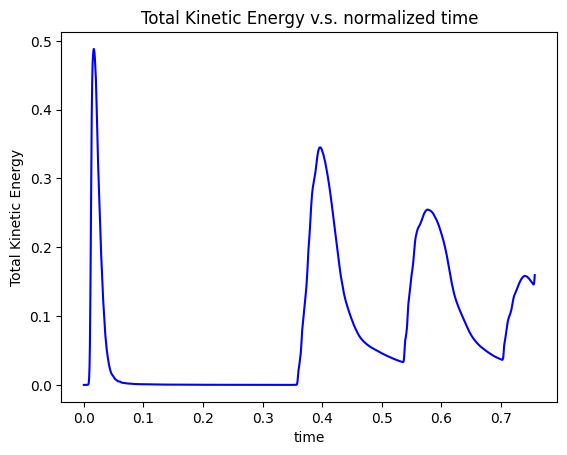

/state/partition1/job-40622197/ipykernel_1750113/2203192914.py:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')


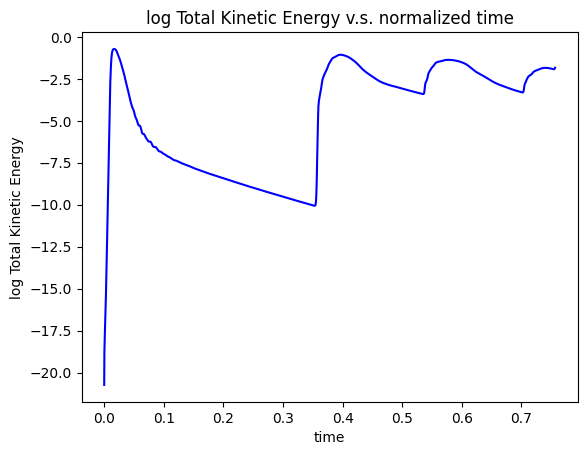

9042
9042


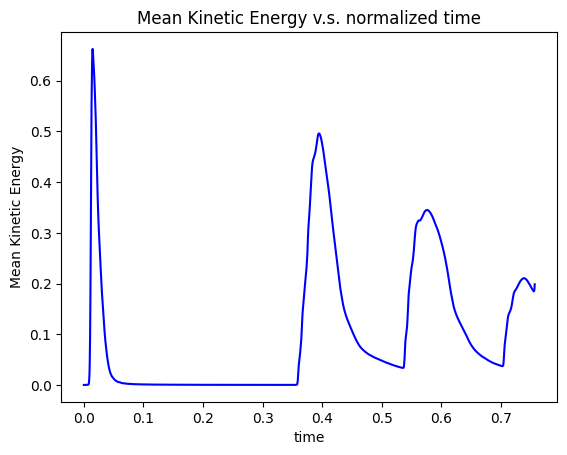

/state/partition1/job-40622197/ipykernel_1750113/2203192914.py:26: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')


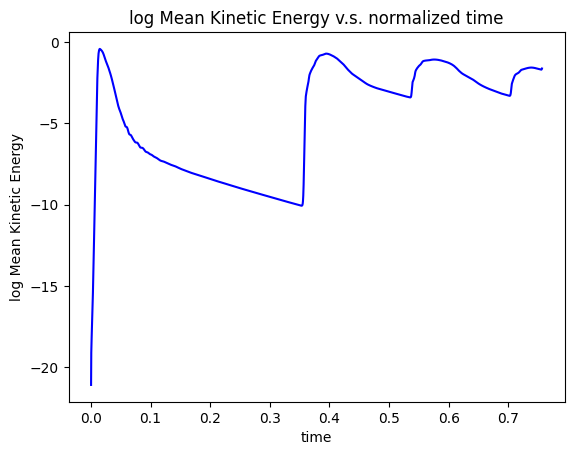

In [9]:
print(len(all_tot_ke))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Total Kinetic Energy')
plt.title('Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_ke)+1)])
plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Total Kinetic Energy')
plt.title('log Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
print(len(all_mean_ke))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_mean_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_mean_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Mean Kinetic Energy')
plt.title('Mean Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Mean Kinetic Energy')
plt.title('log Mean Kinetic Energy v.s. normalized time')
plt.show()

In [77]:
all_tot_uy = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy.append(uy_each)
print(all_tot_uy[3])
all_tot_ux = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux = file['tasks']['tot ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux_each = ux[t][0][0]
            all_tot_ux.append(ux_each)
print(all_tot_ux[3])
all_tot_uz = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz = file['tasks']['tot uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz_each = uz[t][0][0]
            all_tot_uz.append(uz_each)
print(all_tot_uz[3])

"""
trying to use Fourier series to approximate
"""


# Generate sample data (replace this with your dataset)
# first 500 second approximation for uy
uy_for_approx_500 = np.array(all_tot_uy)[:5000]
time_500 = np.array([x/10 for x in range(1, len(uy_for_approx_500)+1)])
matrix_A_500 = np.vstack([np.ones(len(uy_for_approx_500)), np.cos(0.06 * time_500), np.sin(0.06 * time_500)]).T
regression_uy_500 = uy_for_approx_500[:, np.newaxis]
alpha_for_uy_500 = np.linalg.lstsq(matrix_A_500, regression_uy_500, rcond=None)[0]
print(alpha_for_uy_500)

# time after 500 second approximation for uy
uy_for_approx_after = np.array(all_tot_uy)[5000:]
time_after = np.array([x/10 for x in range(1, len(uy_for_approx_after)+1)])
matrix_A_after = np.vstack([np.ones(len(uy_for_approx_after)), np.cos(0.05 * time_after), np.sin(0.05 * time_after)]).T
regression_uy_after = uy_for_approx_after[:, np.newaxis]
alpha_for_uy_after = np.linalg.lstsq(matrix_A_after, regression_uy_after, rcond=None)[0]
print(alpha_for_uy_after)

# first 500 second approximation for ux
ux_for_approx_500 = np.array(all_tot_ux)[:5000]
matrix_A_500 = np.vstack([np.ones(len(ux_for_approx_500)), np.cos(0.06 * time_500), np.sin(0.06 * time_500)]).T
regression_ux_500 = ux_for_approx_500[:, np.newaxis]
alpha_for_ux_500 = np.linalg.lstsq(matrix_A_500, regression_ux_500, rcond=None)[0]
print(alpha_for_ux_500)

# time after 500 second approximation for ux
ux_for_approx_after = np.array(all_tot_ux)[5000:]
matrix_A_after = np.vstack([np.ones(len(ux_for_approx_after)), np.cos(0.05 * time_after), np.sin(0.05 * time_after)]).T
regression_ux_after = ux_for_approx_after[:, np.newaxis]
alpha_for_ux_after = np.linalg.lstsq(matrix_A_after, regression_ux_after, rcond=None)[0]
print(alpha_for_ux_after)

3.0897139988484307e-14
-3.1911102112639044e-12
-2.9801666260439496e-17
[[ 8.59055156e-05]
 [-1.11649790e-02]
 [-2.97701844e-03]]
[[-0.00045171]
 [ 0.01275609]
 [-0.01235564]]
[[ 0.00011969]
 [ 0.00321817]
 [-0.01070038]]
[[0.00019938]
 [0.01196538]
 [0.01267406]]


9042
9042


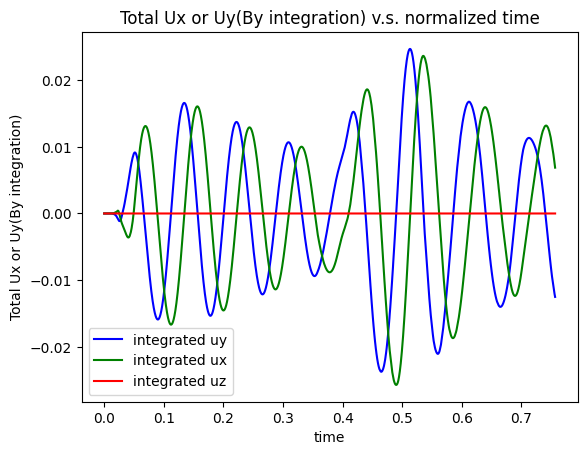

9042
9042


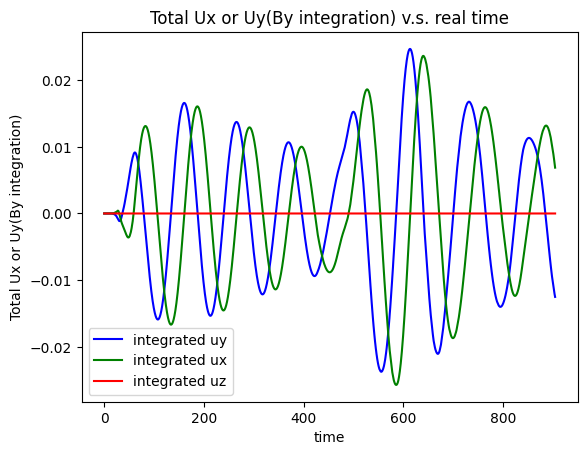

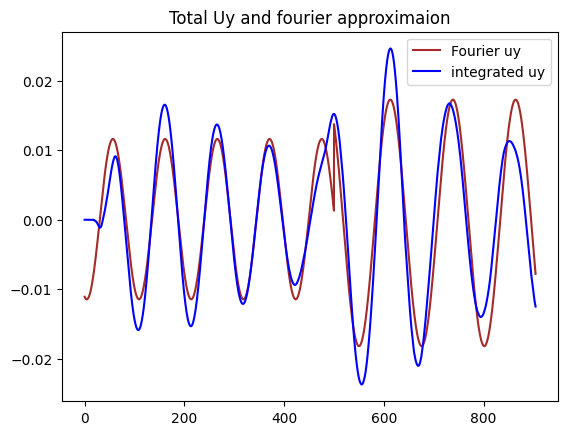

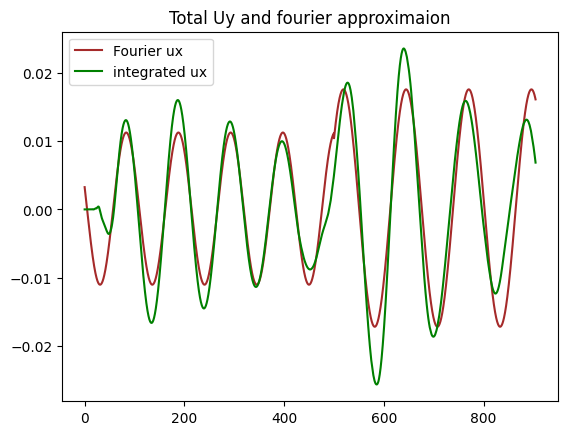

<Figure size 640x480 with 0 Axes>

In [89]:
print(len(all_tot_uy))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_uy)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy, color = 'blue', label='integrated uy')
plt.plot(figure_x_axis, all_tot_ux, color = 'green', label='integrated ux')
plt.plot(figure_x_axis, all_tot_uz, color = 'red', label='integrated uz')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. normalized time')
plt.legend()
plt.show()
plt.clf()
"""
I suspect that, because it is integrated, then total uz is always 0
"""

print(len(all_tot_uy))
time_x_axis = np.array([x/10 for x in range(1, len(all_tot_uy)+1)])
print(len(figure_x_axis))
plt.plot(time_x_axis, all_tot_uy, color = 'blue', label='integrated uy')
plt.plot(time_x_axis, all_tot_ux, color = 'green', label='integrated ux')
plt.plot(time_x_axis, all_tot_uz, color = 'red', label='integrated uz')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. real time')
plt.legend()
plt.show()
plt.clf()

approx_time_500 = time_x_axis[:5000]
approx_time_after = time_x_axis[5000:]
approx_uy_500 = alpha_for_uy_500[0]+alpha_for_uy_500[1]*np.cos(0.06* approx_time_500)+alpha_for_uy_500[2]*np.sin(0.06 * approx_time_500)
approx_uy_after = alpha_for_uy_after[0]+alpha_for_uy_after[1]*np.cos(0.05* approx_time_after)+alpha_for_uy_after[2]*np.sin(0.05 * approx_time_after)
approximation_uy = np.concatenate((approx_uy_500, approx_uy_after))


plt.plot(time_x_axis, approximation_uy,color = 'brown', label='Fourier uy')
plt.plot(time_x_axis, all_tot_uy, color = 'blue', label='integrated uy')
plt.title('Total Uy and fourier approximaion')
plt.legend()
plt.show()
plt.clf()


approx_ux_500 = alpha_for_ux_500[0]+alpha_for_ux_500[1]*np.cos(0.06* approx_time_500)+alpha_for_ux_500[2]*np.sin(0.06 * approx_time_500)
approx_ux_after = alpha_for_ux_after[0]+alpha_for_ux_after[1]*np.cos(0.05* approx_time_after)+alpha_for_ux_after[2]*np.sin(0.05 * approx_time_after)
approximation_ux = np.concatenate((approx_ux_500, approx_ux_after))


plt.plot(time_x_axis, approximation_ux,color = 'brown', label='Fourier ux')
plt.plot(time_x_axis, all_tot_ux, color = 'green', label='integrated ux')
plt.title('Total Uy and fourier approximaion')
plt.legend()
plt.show()
plt.clf()

In [11]:
all_tot_uy2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy2 = file['tasks']['ke by uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy2_each = uy2[t][0][0]
            all_tot_uy2.append(uy2_each)
print(all_tot_uy2[3])
all_tot_ux2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux2 = file['tasks']['ke by ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux2_each = ux2[t][0][0]
            all_tot_ux2.append(ux2_each)
print(all_tot_ux2[3])
all_tot_uz2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz2 = file['tasks']['ke by uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz2_each = uz2[t][0][0]
            all_tot_uz2.append(uz2_each)
print(all_tot_uz2[3])

5.3517393400053874e-14
8.609685588432156e-10
2.610869690979082e-09


9042
9042


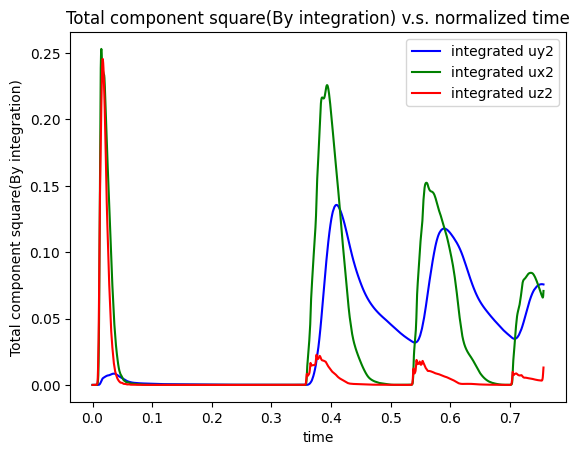

In [12]:
print(len(all_tot_uy2))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_uy2)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy2, color = 'blue', label='integrated uy2')
plt.plot(figure_x_axis, all_tot_ux2, color = 'green', label='integrated ux2')
plt.plot(figure_x_axis, all_tot_uz2, color = 'red', label='integrated uz2')
plt.xlabel('time')
plt.ylabel('Total component square(By integration)')
plt.title('Total component square(By integration) v.s. normalized time')
plt.legend()
plt.show()

In [4]:
"""
ANOTHER DEBUGGING CONTROL GROUP
"""
folder_dir = "snapshots"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))

all_ux_at_600_15 = []
all_uy_at_600_15 = []
all_ux_at_300_15 = []
all_uy_at_300_15 = []
all_ux_at_300_30 = []
all_uy_at_300_30 = []

for file_path in file_paths:
    with h5py.File(file_path, mode='r') as file:
        u = file['tasks']['u']
        st = file['scales/sim_time']
        simtime = np.array(st)
        
        indices = [(600, 15), (300, 15), (300, 30)]
        
        for t in range(len(simtime)):
            for idx in indices:
                each_ux = u[t][0][idx[0]][idx[1]]
                each_uy = u[t][1][idx[0]][idx[1]]
                
                if idx == (600, 15):
                    all_ux_at_600_15.append(each_ux)
                    all_uy_at_600_15.append(each_uy)
                elif idx == (300, 15):
                    all_ux_at_300_15.append(each_ux)
                    all_uy_at_300_15.append(each_uy)
                elif idx == (300, 30):
                    all_ux_at_300_30.append(each_ux)
                    all_uy_at_300_30.append(each_uy)
        if len(all_ux_at_600_15) % 500 == 0:
            print(len(all_ux_at_600_15))
print(len(all_ux_at_600_15), len(all_uy_at_600_15))

x_axis = np.array([x/4 for x in range(1, len(all_ux_at_600_15)+1)])
print(len(x_axis))


500
1000
1500
2000
2500
3000
3500
4000
4000 4000
4000


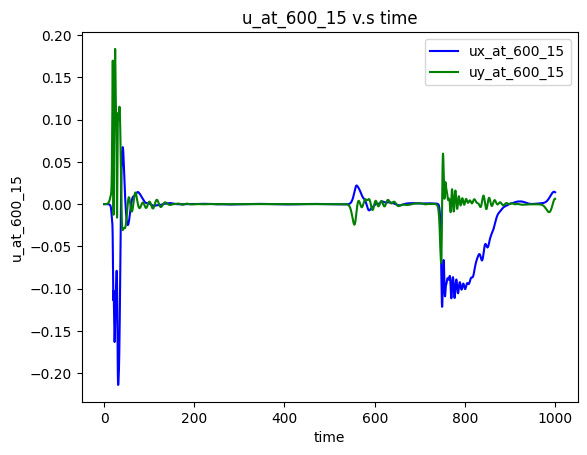

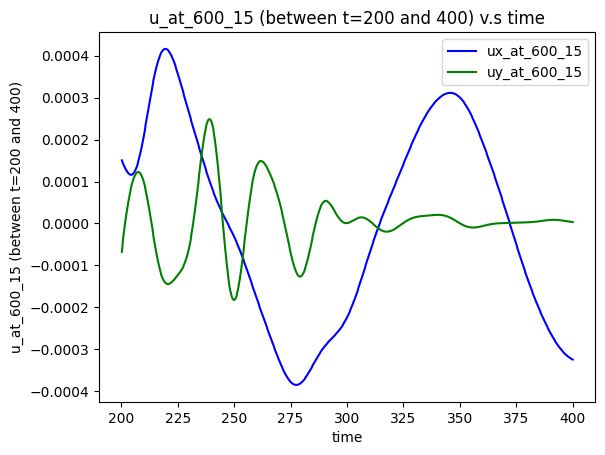

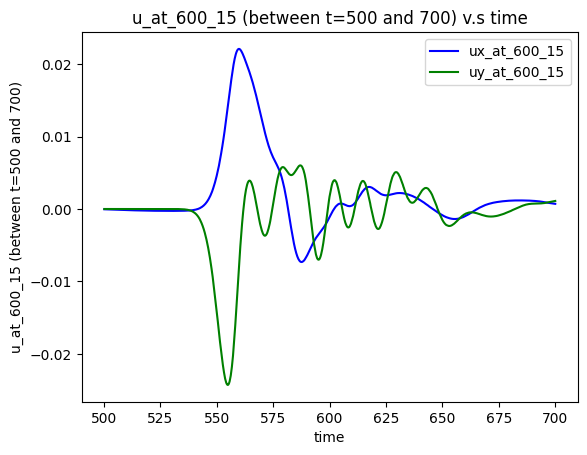

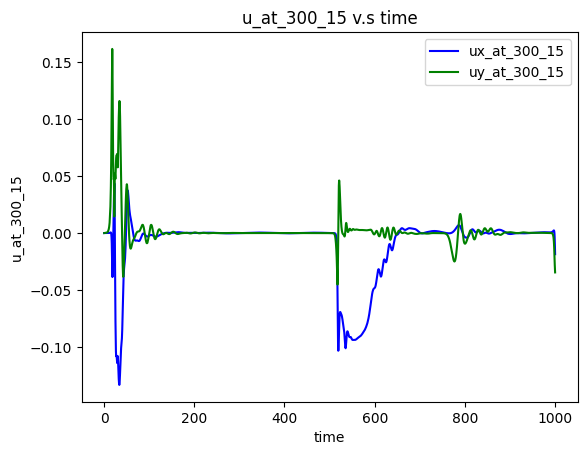

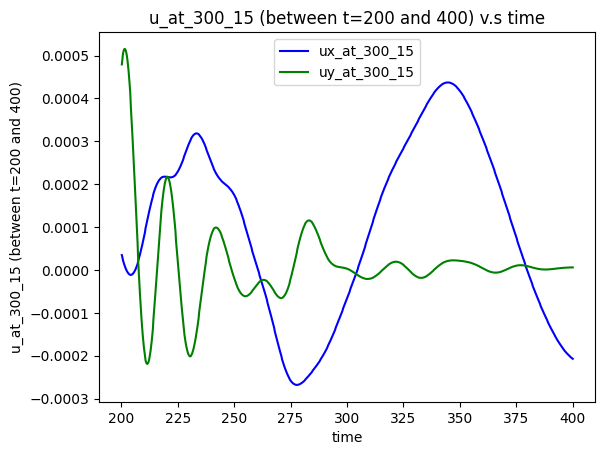

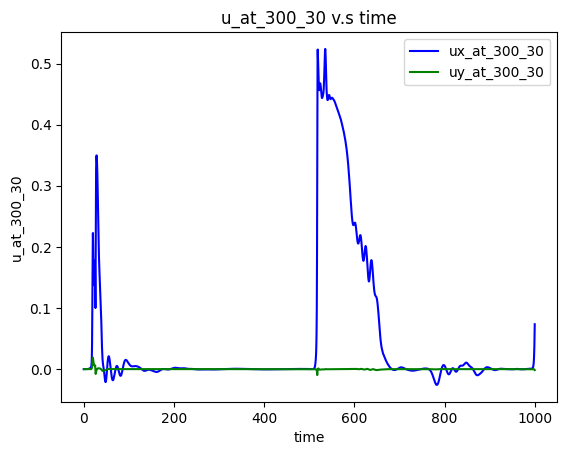

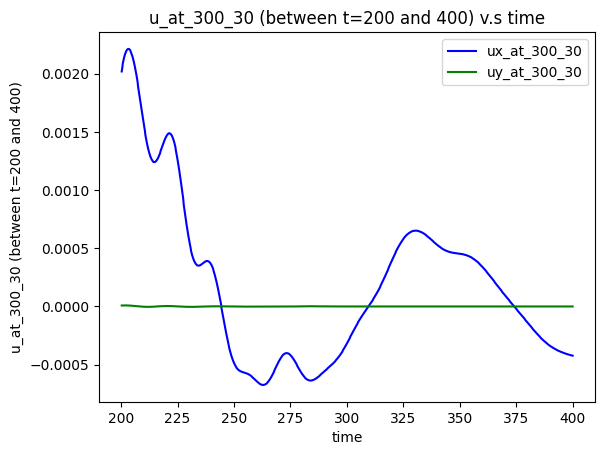

<Figure size 640x480 with 0 Axes>

In [5]:
"""
point (600, 15)
"""
plt.plot(x_axis, all_ux_at_600_15, color = 'blue', label='ux_at_600_15')
plt.plot(x_axis, all_uy_at_600_15, color = 'green', label='uy_at_600_15')
plt.xlabel('time')
plt.ylabel('u_at_600_15')
plt.title('u_at_600_15 v.s time')
plt.legend()
plt.show()
plt.clf()


plt.plot(x_axis[800:1600], all_ux_at_600_15[800:1600], color = 'blue', label='ux_at_600_15')
plt.plot(x_axis[800:1600], all_uy_at_600_15[800:1600], color = 'green', label='uy_at_600_15')
plt.xlabel('time')
plt.ylabel('u_at_600_15 (between t=200 and 400)')
plt.title('u_at_600_15 (between t=200 and 400) v.s time')
plt.legend()
plt.show()
plt.clf()

plt.plot(x_axis[2000:2800], all_ux_at_600_15[2000:2800], color = 'blue', label='ux_at_600_15')
plt.plot(x_axis[2000:2800], all_uy_at_600_15[2000:2800], color = 'green', label='uy_at_600_15')
plt.xlabel('time')
plt.ylabel('u_at_600_15 (between t=500 and 700)')
plt.title('u_at_600_15 (between t=500 and 700) v.s time')
plt.legend()
plt.show()
plt.clf()

"""
point (300, 15)
"""
plt.plot(x_axis, all_ux_at_300_15, color = 'blue', label='ux_at_300_15')
plt.plot(x_axis, all_uy_at_300_15, color = 'green', label='uy_at_300_15')
plt.xlabel('time')
plt.ylabel('u_at_300_15')
plt.title('u_at_300_15 v.s time')
plt.legend()
plt.show()
plt.clf()

plt.plot(x_axis[800:1600], all_ux_at_300_15[800:1600], color = 'blue', label='ux_at_300_15')
plt.plot(x_axis[800:1600], all_uy_at_300_15[800:1600], color = 'green', label='uy_at_300_15')
plt.xlabel('time')
plt.ylabel('u_at_300_15 (between t=200 and 400)')
plt.title('u_at_300_15 (between t=200 and 400) v.s time')
plt.legend()
plt.show()
plt.clf()


"""
at point (300, 30)
"""
plt.plot(x_axis, all_ux_at_300_30, color = 'blue', label='ux_at_300_30')
plt.plot(x_axis, all_uy_at_300_30, color = 'green', label='uy_at_300_30')
plt.xlabel('time')
plt.ylabel('u_at_300_30')
plt.title('u_at_300_30 v.s time')
plt.legend()
plt.show()
plt.clf()

plt.plot(x_axis[800:1600], all_ux_at_300_30[800:1600], color = 'blue', label='ux_at_300_30')
plt.plot(x_axis[800:1600], all_uy_at_300_30[800:1600], color = 'green', label='uy_at_300_30')
plt.xlabel('time')
plt.ylabel('u_at_300_30 (between t=200 and 400)')
plt.title('u_at_300_30 (between t=200 and 400) v.s time')
plt.legend()
plt.show()
plt.clf()